# Visualizaciones en Python (Parte II)

### OBJETIVOS DE LA CLASE

* Aprender a graficar datos en Python.
* Entender el uso básico de las librerías más utilizadas: Matplotlib y Seaborn.


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt #conda install -c conda-forge matplotlib
import seaborn as sns #conda install -c anaconda seaborn
import pandas as pd #conda install -c anaconda pandas 

In [29]:
#Estilos existentes:
#https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html
mpl.style.use('bmh')

In [8]:
df_lluvias = pd.read_csv(r'~\Downloads\archive/pune_1965_to_2002.csv', index_col = 'Year')
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


### Subgráficos


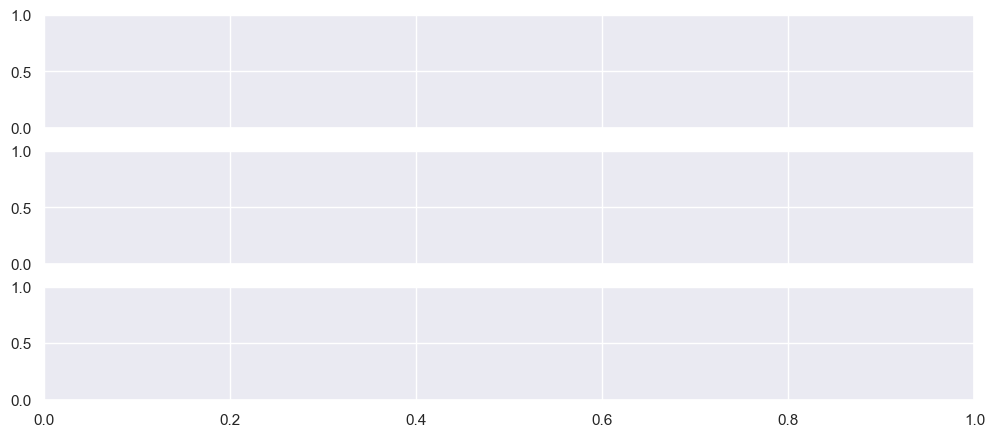

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 
#Como los años son los mismos para todos los gráficos, ponemos el parámetro sharex y sharey en True

In [44]:
type(fig)

matplotlib.figure.Figure

In [26]:
#A cada fila, le asignamos las precipitaciones de un mes
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')

In [27]:
#Por último, añadimos texto y leyendas
ax[0].set_title('Precipitaciones de los primeros tres meses del año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Precipitación (mm.)')

ax[0].legend()  
ax[1].legend()
ax[2].legend()  

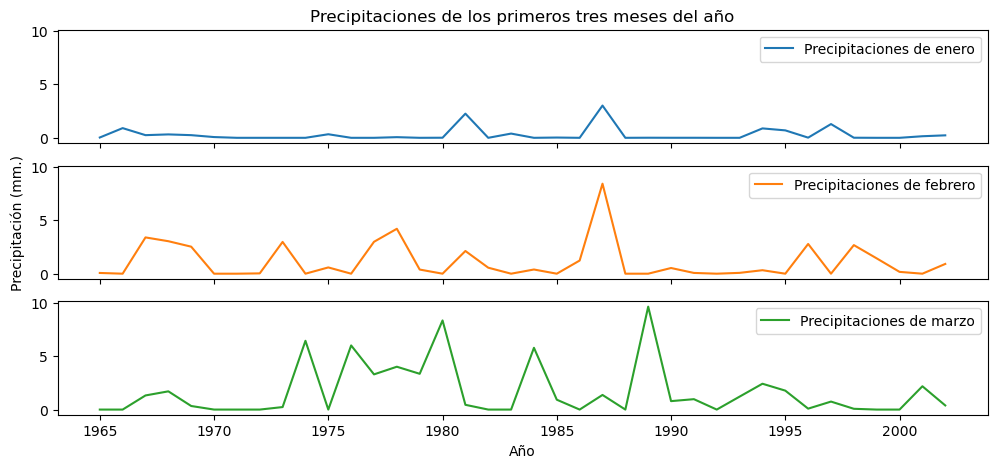

In [28]:
fig

Al pasar sharey=True, los subgráficos comparten la escala en el eje y. Esto permitió comparar a simple vista el volumen <br>
de precipitaciones.<br>
* Cada subgráfico puede tener su propio título y etiquetas.<br>
* En caso de tener dos filas y dos columnas, ax se torna bidimensional:<br>
    * El subgráfico superior izquierdo se referencia con ax[0,0]<br>
    * El subgráfico superior derecho se referencia con ax[0,1]<br>

### Personalizando Matplotlib

* Matplotlib permite modificar cada aspecto de sus gráficos por medio de parámetros.<br>
* Al importar la librería, Matplotlib establece establece sus parámetros por defecto.<br>
* Los parámetros se guardan en una estructura de datos de tipo dict. Se puede obtener una lista de los parámetros <br>
consultando sus claves.<br>

In [14]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': '#bcbcbc',
          'axes.facecolor': '#eeeeee',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.

#### Algunos ejemplos:

|      Parámetro     | Descripción              | Valor por defecto |   |   |
|:------------------:|--------------------------|:-----------------:|---|---|
| axes.grid          | Mostrar grilla           | True              |   |   |
| axes.titleweight   | Grosor tipografía título | "normal"          |   |   |
| axes.titlelocation | Posición del título      | "center"          |   |   |

In [34]:
mpl.rcParams['axes.titleweight'] = 'bold' 
mpl.rcParams['axes.titlelocation'] = 'left' 
mpl.rcParams['axes.titlecolor'] = 'firebrick' 
mpl.rcParams['axes.labelcolor'] = 'blue' 
mpl.rcParams['axes.labelsize'] = '10' 
mpl.rcParams['axes.labelweight'] = 'light' 
mpl.rcParams['axes.linewidth'] = '1' 
mpl.rcParams['grid.color'] = 'black' 
mpl.rcParams['grid.linestyle'] = '-.' 
mpl.rcParams['grid.linewidth'] = '2' 

Text(0, 0.5, '(Etiqueta eje vert.)')

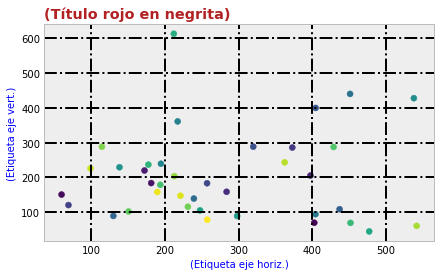

In [16]:
fig, ax = plt.subplots(figsize=(7, 4))  
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
ax.set_title('(Título rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

In [24]:
mpl.rcParams.update(mpl.rcParamsDefault)

## La librería Seaborn

Funciona por encima de matplotlib. 
* Se integra muy bien con las estructuras de datos de Pandas.
* Provee métodos que facilitan la generación de gráficos para la comparación de variables categóricas.
* Provee sus propios estilos y colores (muy estéticos, por cierto 😏).

* Seaborn tiene una sintaxis diferente a matplotlib, por lo que sólo lo aprovecharemos por su punto fuerte: las visualizaciones de variables categóricas.
* Como Seaborn se construye sobre matplotlib, puede actualizar los parámetros de matplotlib con los estilos de Seaborn y seguir graficando normalmente.


In [35]:
sns.set() ## Aplica el tema Seaborn predeterminado, la escala y la paleta de colore.(mpl.rcParams.update(mpl.rcParamsDefault))

In [38]:
#Seaborn trae algunos datasets de prueba, exploremos uno:

#Los valores son mediciones del pulso de 30 personas tras realizar algún tipo de actividad por un determinado tiempo. Las columnas son:
#Id: 	número identificador de la persona
#Diet: dieta de la persona			baja en grasas o sin grasas
#Time: duración del ejercicio		1 min, 15 min o 30 min
#Kind: tipo de ejercicio			reposo, caminar o correr

df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
df_ejercicio.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [39]:
#1)Extraigamos sólo aquellas observaciones que se corresponden con un ejercicio de 30 minutos

df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


* Debemos especificar la columna de valores en el parámetro x, en este caso nos interesa la columna pulse
* Como queremos separar las distribuciones según el tipo de actividad, pasamos el parámetro hue='kind'

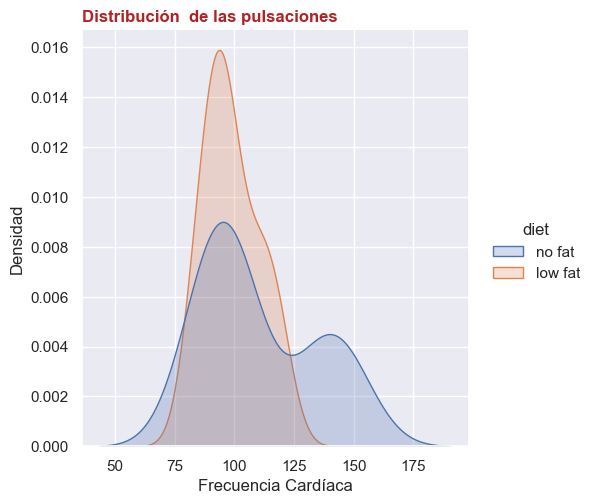

In [54]:
#1) Probar en kind = ['hist', 'kde', 'ecdf']
#2) Probar fill = [True, False]
#3) Probar hue = [kind, diet]

ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='diet', fill=True)
#ax = sns.displot(data=df_30_min, x='pulse', kind='ecdf', hue='kind')
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

In [46]:
type(ax)

seaborn.axisgrid.FacetGrid

### Seaborn: Categorical Plots


sns.catplot con el parámetro kind='violin' permite comparar distribuciones separando los datos en base a dos categorías simultáneamente.

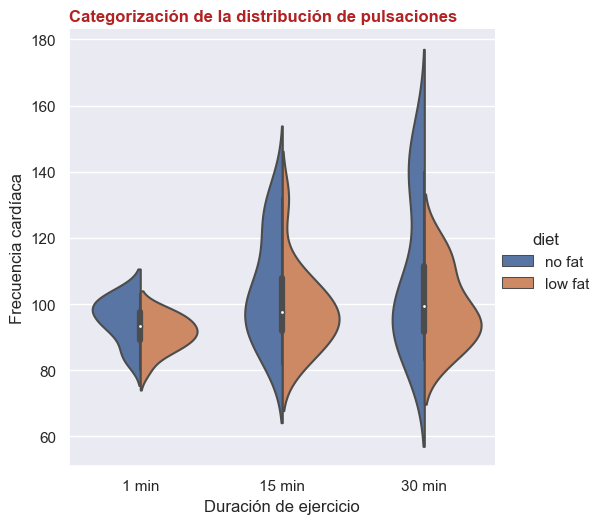

In [55]:
# 1) Probar cambiar los ejes.
# 2) Probar x = [time, kind]

ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')

### Desafio Generico

Consigna: <br>
1. Cargar [este](https://drive.google.com/file/d/1Msf9fKLNyQJFmZbPecSe1G23kjkPg-ap/view) archivo en Python. Realizar estadísticas descriptivas básicas
2. Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares por Departamento?
3. Graficar la serie de tiempo correspondiente a LastPerformanceReview_Date y el Salario


In [57]:
df = pd.read_csv(r"~/Downloads/HRDataset_v14.csv")

In [58]:
#1)Realizar estadísticas descriptivas básicas
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

C:\Users\mi13966\Miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


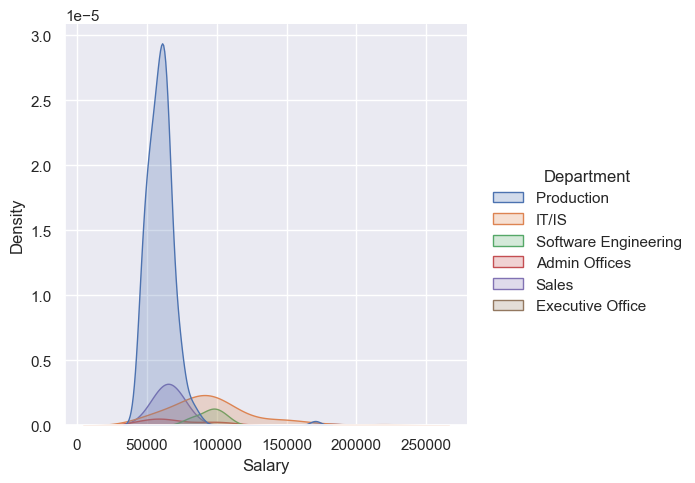

In [61]:
#2) Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares por Departamento?
ax = sns.displot(data=df, x='Salary', kind='kde', hue='Department', fill=True)

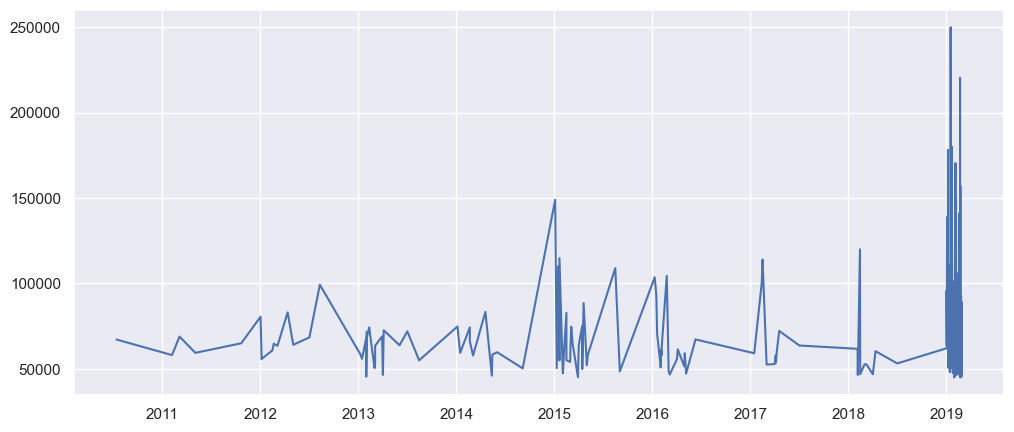

In [63]:
#3) Graficar la serie de tiempo correspondiente a LastPerformanceReview_Date y el Salario
# Tip buscar ordenar las fechas
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 
df.LastPerformanceReview_Date = pd.to_datetime(df.LastPerformanceReview_Date)
df1 = df.sort_values(by='LastPerformanceReview_Date')
ax.plot(df1.LastPerformanceReview_Date, df1.Salary, label='Salarios')

In [64]:
df1

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
280,"Thibaud, Kenneth",10268,0,4,1,5,5,3,0,67176,...,Webster Butler,39.0,Other,Fully Meets,4.10,4,0,2010-07-14,0,15
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2011-02-06,0,9
112,"Gonzalez, Juan",10300,1,1,1,5,5,1,1,68898,...,Brannon Miller,12.0,Diversity Job Fair,PIP,3.00,3,0,2011-03-06,3,10
50,"Close, Phil",10269,1,1,1,5,5,3,0,59369,...,David Stanley,14.0,Indeed,Fully Meets,4.20,4,0,2011-05-04,0,6
233,"Roberson, May",10230,0,2,0,5,5,3,0,64971,...,David Stanley,14.0,Google Search,Fully Meets,4.50,4,0,2011-10-22,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,"Billis, Helen",10003,1,1,0,1,5,4,0,62910,...,Brannon Miller,12.0,Indeed,Exceeds,5.00,3,0,2019-02-27,0,19
48,"Clayton, Rick",10220,0,0,1,1,3,3,0,68678,...,Eric Dougall,6.0,Indeed,Fully Meets,4.70,3,6,2019-02-27,0,2
63,"Davis, Daniel",10143,0,0,1,1,5,3,0,56294,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.96,4,0,2019-02-27,0,6
51,"Clukey, Elijian",10029,1,1,1,2,5,4,0,50373,...,Brannon Miller,12.0,Employee Referral,Exceeds,4.10,4,0,2019-02-28,0,5
